In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('husband_wife_arguments.csv')

df.head()


,Argument ID,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes
0,1,2024-01-05,43,Parenting Styles,Disappointed,No Resolution,Mild,Discussed parenting styles for 43 minutes. Emo...
1,2,2024-02-05,24,Parenting Styles,Annoyed,Compromise,Severe,Discussed parenting styles for 24 minutes. Emo...
2,3,2024-02-27,25,Money Management,Annoyed,No Resolution,Moderate,Discussed money management for 25 minutes. Emo...
3,4,2024-02-07,20,Time Management,Angry,Resolution Discussed,Moderate,Discussed time management for 20 minutes. Emot...
4,5,2024-01-26,7,Future Goals,Frustrated,Resolution Discussed,Mild,Discussed future goals for 7 minutes. Emotiona...


In [8]:
df.tail()

,Argument ID,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes
1495,1496,2024-01-02,43,Parenting Styles,Calm,Compromise,Mild,Discussed parenting styles for 43 minutes. Emo...
1496,1497,2024-01-15,22,Money Management,Supportive,Apology,NaN,Discussed money management for 22 minutes. Emo...
1497,1498,2024-01-21,16,Social Activities,Happy,Resolution Discussed,Mild,Discussed social activities for 16 minutes. Em...
1498,1499,2024-01-26,12,Social Activities,Annoyed,Compromise,Mild,Discussed social activities for 12 minutes. Em...
1499,1500,2024-02-22,51,Time Management,Calm,No Resolution,NaN,Discussed time management for 51 minutes. Emot...


In [12]:
df.shape

(1500, 8)

In [20]:
df.columns

Index(['Date', 'Duration (minutes)', 'Topic', 'Emotional Tone',
       'Resolution Type', 'Mood Swing', 'Notes'],
      dtype='object')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.isnull().sum()

Date                    0
Duration (minutes)      0
Topic                   0
Emotional Tone          0
Resolution Type         0
Mood Swing            336
Notes                   0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                1500 non-null   object
 1   Duration (minutes)  1500 non-null   int64 
 2   Topic               1500 non-null   object
 3   Emotional Tone      1500 non-null   object
 4   Resolution Type     1500 non-null   object
 5   Mood Swing          1164 non-null   object
 6   Notes               1500 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.2+ KB


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])

In [25]:
df.describe()

,Duration (minutes),Year,Month,Day
count,1500.000000,1500.0,1500.000000,1500.000000
mean,32.763333,2024.0,1.506667,15.122667
std,16.379607,0.0,0.523582,8.620586
min,5.000000,2024.0,1.000000,1.000000
25%,18.000000,2024.0,1.000000,8.000000
50%,33.000000,2024.0,1.000000,15.000000
75%,47.000000,2024.0,2.000000,22.000000
max,60.000000,2024.0,3.000000,31.000000


In [28]:
df['Mood Swing'].fillna('Cant say', inplace=True)

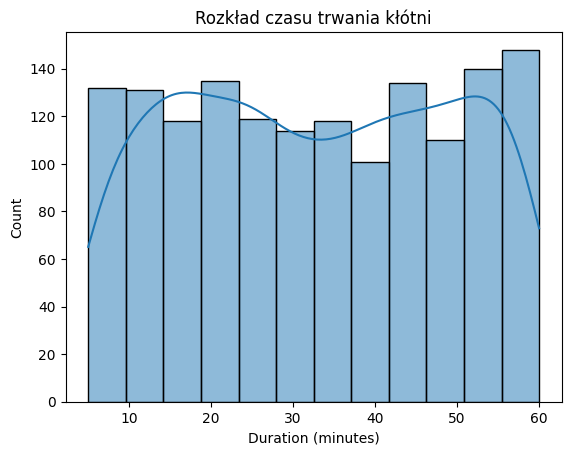

In [29]:
sns.histplot(df['Duration (minutes)'], kde=True)
plt.title('Rozkład czasu trwania kłótni')
plt.show()

In [33]:
categorical_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_features], axis=1)


from sklearn.preprocessing import StandardScaler
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Duration (minutes),Year,Month,Day,Topic_Future Goals,Topic_Household Chores,Topic_Money Management,Topic_Parenting Styles,Topic_Personal Space,Topic_Social Activities,...,Notes_Discussed time management for 6 minutes. Emotional tone was Supportive. Mood swings observed: Mild. Resolution type: Apology.,Notes_Discussed time management for 60 minutes. Emotional tone was Frustrated. Mood swings observed: Mild. Resolution type: Resolution Discussed.,Notes_Discussed time management for 60 minutes. Emotional tone was Hurt. Mood swings observed: Mild. Resolution type: Apology.,Notes_Discussed time management for 60 minutes. Emotional tone was Supportive. Mood swings observed: Mild. Resolution type: Compromise.,Notes_Discussed time management for 7 minutes. Emotional tone was Calm. Mood swings observed: Mild. Resolution type: Apology.,Notes_Discussed time management for 7 minutes. Emotional tone was Frustrated. Mood swings observed: Severe. Resolution type: Apology.,Notes_Discussed time management for 8 minutes. Emotional tone was Supportive. Mood swings observed: Mild. Resolution type: Resolution Discussed.,Notes_Discussed time management for 8 minutes. Emotional tone was Supportive. Mood swings observed: Moderate. Resolution type: Resolution Discussed.,Notes_Discussed time management for 9 minutes. Emotional tone was Annoyed. Mood swings observed: Moderate. Resolution type: Compromise.,Notes_Discussed time management for 9 minutes. Emotional tone was Frustrated. Mood swings observed: Moderate. Resolution type: Resolution Discussed.
0,0.625173,2024,1,5,-0.365769,-0.388831,-0.398994,2.641727,-0.377388,-0.364596,...,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828
1,-0.535193,2024,2,5,-0.365769,-0.388831,-0.398994,2.641727,-0.377388,-0.364596,...,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828
2,-0.474121,2024,2,27,-0.365769,-0.388831,2.506303,-0.378540,-0.377388,-0.364596,...,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828
3,-0.779481,2024,2,7,-0.365769,-0.388831,-0.398994,-0.378540,-0.377388,-0.364596,...,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828
4,-1.573415,2024,1,26,2.733967,-0.388831,-0.398994,-0.378540,-0.377388,-0.364596,...,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828,-0.025828


In [40]:
X = df.drop('Duration (minutes)', axis=1).astype(float)
y = df['Duration (minutes)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 1506), (300, 1506), (1200,), (300,))

In [45]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [47]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

mlp_model.fit(X_train, y_train)


MLPRegressor(max_iter=500, random_state=42)

In [48]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R-squared: {r2_rf}")

y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor Mean Squared Error: {mse_mlp}")
print(f"MLP Regressor R-squared: {r2_mlp}")


input_example = X_train.iloc[:5]

with mlflow.start_run():
    mlflow.sklearn.log_model(lr_model, "linear_regression_model", input_example=input_example)
    mlflow.log_metric("mse_lr", mse_lr)
    mlflow.log_metric("r2_lr", r2_lr)
    
    mlflow.sklearn.log_model(rf_model, "random_forest_regressor_model", input_example=input_example)
    mlflow.log_metric("mse_rf", mse_rf)
    mlflow.log_metric("r2_rf", r2_rf)
    
    mlflow.sklearn.log_model(mlp_model, "mlp_regressor_model", input_example=input_example)
    mlflow.log_metric("mse_mlp", mse_mlp)
    mlflow.log_metric("r2_mlp", r2_mlp)

Linear Regression Mean Squared Error: 1.0011935262077343
Linear Regression R-squared: 0.0026889383399900657
Random Forest Regressor Mean Squared Error: 1.171751915312216
Random Forest Regressor R-squared: -0.16720805326073096
MLP Regressor Mean Squared Error: 2.564107534648997
MLP Regressor R-squared: -1.554164345506
